## Assignment 2 ATiML

### 2.1 What filter techniques from the feature selection framework can be applied for a text classification task? What filters are not, or at least less, suitable for text? Justify your answer under a careful reconsideration of the nature of the features in use! For simplicityjust assume a Bag-Of-Words representation of the text.



Given a Bag-of Words representation of text documents our features are all the words in the vocabulary and values represent their occurence(1) or non-occurrence(1). For this use case it is appropriate to use filters for nominal data rather than numerical data. Some filtering methods that can be used in many text classification techniques include as Chi-squared, Document Frequency (DF), Information Gain (IG), and Mutual Information (MI).

### 2.2 Implement suitable filters (or use methods from Python Sk-learn or similar tool-kits) for a classification task of your own choice! Report performance measures (you can consider a benchmark dataset like 20 Newsgroups) of your classifiers in respect to the filtered features, e.g. on a regular grid (50, 100, 150, 200, 250, ...) of feature set sizes. Provide plots where ever possible to explain your answer.


In [24]:
# import the required module from scikit learn
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import pandas as pd

In [ ]:
data_train = fetch_20newsgroups(subset='train',
                                shuffle=True, random_state=42, )

data_test = fetch_20newsgroups(subset='test',
                               shuffle=True, random_state=42)


target_names = data_train.target_names
print(target_names)
data_train.target[:10]

print(len(data_train.data))
print(len((data_test.data)))

In [26]:
# So, first converting text data into vectors of numerical values using CountVectorizer to form feature vector
vectorizer = CountVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data) 


In [ ]:
print (data_train_vectors.shape)
print(data_train.target.shape)
print(type(data_train_vectors))

# store training feature matrix in "Xtr"
Xtr = data_train_vectors
# store training response vector in "ytr"
ytr = data_train.target

# store testing feature matrix in "Xtt"
Xtt = data_test_vectors
# store testing response vector in "ytt"
ytt = data_test.target

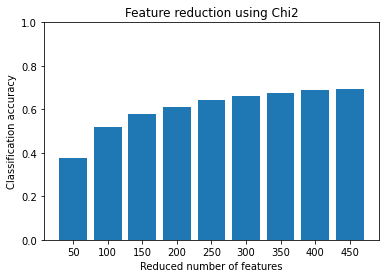

In [28]:
# Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", MultinomialNB(alpha=.01)),
    ]
)

N_FEATURES_OPTIONS = np.arange(50, 500, 50)
N_FEATURES_OPTIONS_str = [str(i) for i in N_FEATURES_OPTIONS]



param_grid = [
    {
        "reduce_dim": [SelectKBest(chi2)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
    },
]
reducer_labels = ["KBest(chi2)"]

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
grid.fit(Xtr, ytr)

mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
# select score for best C

plt.bar(N_FEATURES_OPTIONS_str, mean_scores)

plt.title("Feature reduction using Chi2")
plt.xlabel("Reduced number of features")
plt.ylabel("Classification accuracy")
plt.ylim((0, 1))

plt.show()

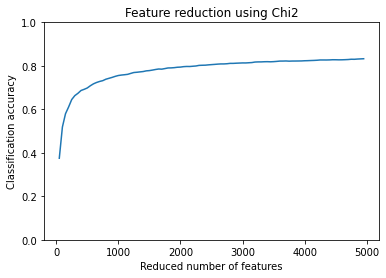

In [7]:
# Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

pipe = Pipeline(
    [
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", MultinomialNB(alpha=.01)),
    ]
)

N_FEATURES_OPTIONS = np.arange(50, 5000, 50)


param_grid = [
    {
        "reduce_dim": [SelectKBest(chi2)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
    },
]
reducer_labels = ["KBest(chi2)", "KBest(chi2)", "KBest(chi2)","KBest(chi2)"]

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
grid.fit(Xtr, ytr)

mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
# select score for best C

plt.plot(N_FEATURES_OPTIONS, mean_scores)

plt.title("Feature reduction using Chi2")
plt.xlabel("Reduced number of features")
plt.ylabel("Classification accuracy")
plt.ylim((0, 1))

plt.show()

It is clear for the graphs that using chi2 filter, an optimal number of features could be found since using all of them would be computationally expensive and may not be that meaningfull(noisy data, stopwords) in the context of classification. From the figure the optimal number of features would be just be the point where accuraccy stars to plateau(elbow-method).

### 2.3 Does the proposed feature scaling affect every Machine-Learning model? If not, which models are affected and which models are not? Justify your answer in respect to the parametrization of your chosen models! (Gaussian-Naive-Bayes, Logistic-Regression and non-linear Support-Vector-Machine models might be good candidates for your reasoning.)


Feature scaling is a method used to normalize the range of features of data. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

Feature scaling intuitively have more effect on the performance of the distance based learning algorithms such as KNN, SVMs as all features have essenntialy an equal weight in learning as opposed to unscaled features. E.g. KNN using euclidean distance will always give inflated distances for features having larger scales e.g. salary as opposed to age.

Also, 'If an algorithm uses gradient descent such as logisitic regression and neural networks, then the difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale will help the gradient descent converge more quickly towards the minima'.

#### Where not that useful?
Tree-based algorithms are fairly insensitive to the scale of the features. A decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features. Hence, there is virtually no effect of the remaining features on the split. Similarly Naive Bayes have little sensitivity to feature scaling.

### 2.4 Use an iteratively trained classifier on a classification task of your own choice (you can consider a benchmark dataset like 20 Newsgroups and a tool-kit of your choice). Compare its convergence when trained on the original feature and on scaled features. Provide plots where ever possible to explain your answer. What do you observe and how can this phenomenon be explained?



In [16]:
scaler = StandardScaler(with_mean=False)
Xtr_scaled = scaler.fit_transform(Xtr)
Xtt_scaled = scaler.transform(Xtt)

In [ ]:
# Defining the model
model1 = Sequential()
model1.add(Dense(40, input_dim=Xtr.shape[1], activation='relu'))
model1.add(Dense(20, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128

# fitting the model.
m1 = model1.fit(Xtr, ytr, batch_size=batch_size, epochs=500, callbacks=[esc, cp], validation_split=0.2)

In [ ]:
# Defining the model
model2 = Sequential()
model2.add(Dense(40, input_dim=Xtr.shape[1], activation='relu'))
model2.add(Dense(20, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="weights_model2.hdf5", monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128

# fitting the model.
m2 = model2.fit(Xtr_scaled, ytr, batch_size=batch_size, epochs=500, callbacks=[esc, cp], validation_split=0.2)

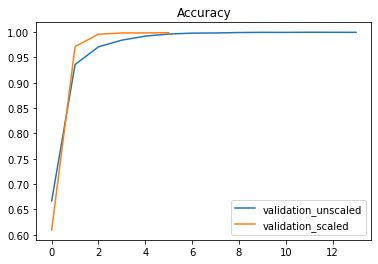

In [22]:
# Training Accuracy History
plt.title('Accuracy')
plt.plot(m1.history['accuracy'], label='validation_unscaled')
plt.plot(m2.history['accuracy'], label='validation_scaled')
plt.legend()
plt.show();

In [ ]:
import matplotlib.pyplot as plt

In [2]:
# Training Accuracy History
plt.title('Validation Accuracy')
plt.plot(m1.history['val_accuracy'], label='validation_unscaled')
plt.plot(m2.history['val_accuracy'], label='validation_scaled')
plt.legend()
plt.show();


NameError: name 'plt' is not defined

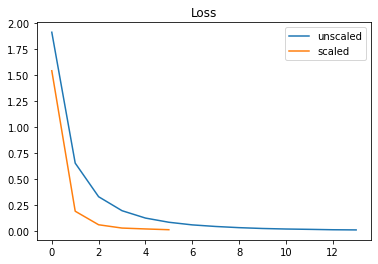

In [21]:
# Training Loss History
plt.title('Loss')
plt.plot(m1.history['loss'], label='unscaled')
plt.plot(m2.history['loss'], label='scaled')
plt.legend()
plt.show();

It is quite clear from the graphs that iteratively trained classifier converge much faster when trained on scaled features then on unscaled features. 

'If an algorithm uses gradient descent, then the difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model. Having features on a similar scale will help the gradient descent converge more quickly towards the minima.'